<a href="https://colab.research.google.com/github/SallmaShaban/SARS-Drug-discovary/blob/main/SARS_Choosing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Library

In [38]:
! pip install scikit-learn
! conda install scikit-learn
! pip install lazypredict

/bin/bash: conda: command not found


# **Import libraries**

In [39]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt


#**Data Prepration**

##Read Data

In [40]:
df = pd.read_csv('/content/bioactivity_data_2class_pIC50.csv')
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.19,2.66,0.00,4.00,4.87
1,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.35,3.63,0.00,3.00,4.88
2,5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.24,4.39,0.00,3.00,6.01
3,7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.24,4.24,0.00,3.00,6.02
4,8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.79,4.28,0.00,3.00,4.95
...,...,...,...,...,...,...,...,...,...
114,128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.36,3.40,0.00,5.00,4.97
115,129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.37,3.44,0.00,3.00,5.00
116,130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.29,4.10,0.00,3.00,4.94
117,131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.31,3.29,0.00,3.00,4.97


##Input features

In [41]:
df['bioactivity_class'] = df['bioactivity_class'].replace({"inactive":0,"active":1})

In [42]:
X = df.drop(['pIC50','molecule_chembl_id','canonical_smiles','Unnamed: 0'], axis=1)
X

,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,0,421.19,2.66,0.00,4.00
1,0,293.35,3.63,0.00,3.00
2,1,372.24,4.39,0.00,3.00
3,1,419.24,4.24,0.00,3.00
4,0,327.79,4.28,0.00,3.00
...,...,...,...,...,...
114,0,338.36,3.40,0.00,5.00
115,0,296.37,3.44,0.00,3.00
116,0,276.29,4.10,0.00,3.00
117,0,278.31,3.29,0.00,3.00


In [43]:
X.shape


(119, 5)

##Output features


In [44]:
Y = df.pIC50
Y

0     4.87
1     4.88
2     6.01
3     6.02
4     4.95
      ... 
114   4.97
115   5.00
116   4.94
117   4.97
118   4.10
Name: pIC50, Length: 119, dtype: float64

In [45]:
Y.shape


(119,)

##Data split (80/20 ratio)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [72]:
X_train.shape, Y_train.shape


((95, 5), (95,))

In [47]:
X_test.shape, Y_test.shape


((24, 5), (24,))

#Building a Regression Model using Random Forest

In [75]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.15152123002344053

In [76]:
Y_pred = model.predict(X_test)


<function matplotlib.pyplot.show>

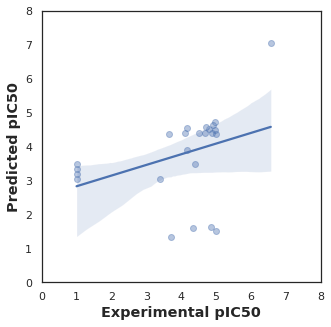

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.figure.set_size_inches(5, 5)
plt.show

#Comparing Regressors

In [81]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)


100%|██████████| 42/42 [00:01<00:00, 22.71it/s]


In [82]:
train


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.06,0.26,1.26,0.02
LarsCV,0.05,0.26,1.26,0.03
LinearSVR,0.05,0.26,1.26,0.01
RidgeCV,0.05,0.26,1.27,0.01
BayesianRidge,0.05,0.25,1.27,0.01
Ridge,0.04,0.25,1.27,0.02
HuberRegressor,0.04,0.25,1.27,0.02
ElasticNetCV,0.04,0.25,1.27,0.06
LassoCV,0.04,0.25,1.27,0.10


In [83]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.06,0.26,1.26,0.02
LarsCV,0.05,0.26,1.26,0.03
LinearSVR,0.05,0.26,1.26,0.01
RidgeCV,0.05,0.26,1.27,0.01
BayesianRidge,0.05,0.25,1.27,0.01
Ridge,0.04,0.25,1.27,0.02
HuberRegressor,0.04,0.25,1.27,0.02
ElasticNetCV,0.04,0.25,1.27,0.06
LassoCV,0.04,0.25,1.27,0.10


[(0.0, 1.0)]

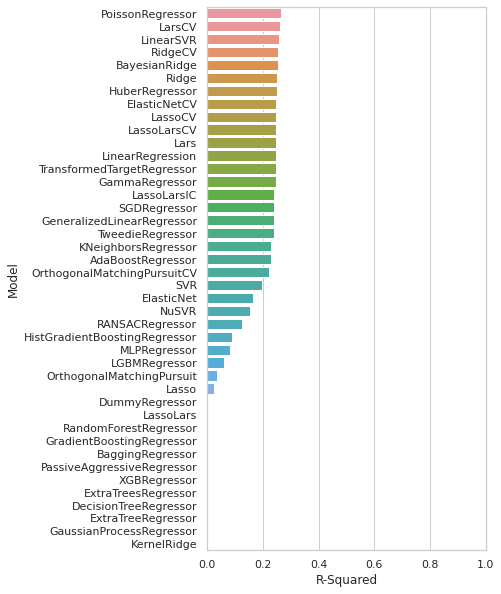

In [85]:
# Bar plot of R-squared values
#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

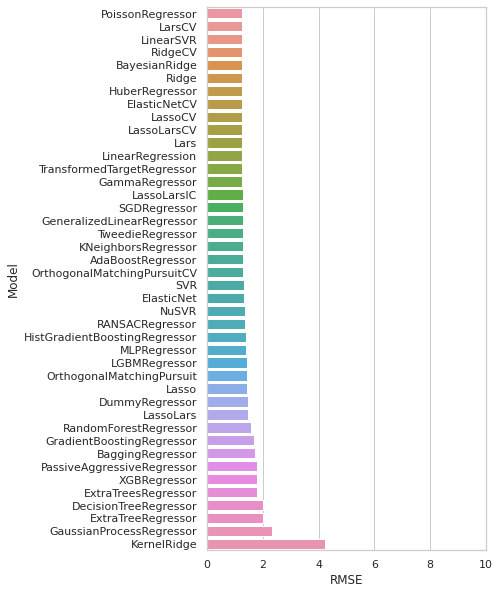

In [86]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

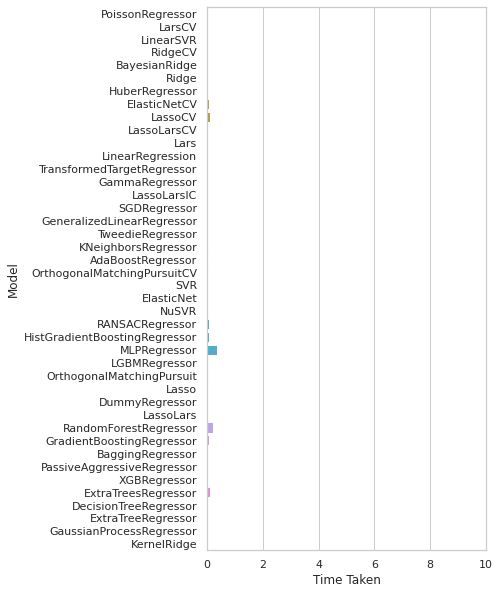

In [87]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))